<a href="https://colab.research.google.com/github/mehdimt1980/Text-Clustering/blob/main/Text_Clustering_on_Hobbes's_Leviathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


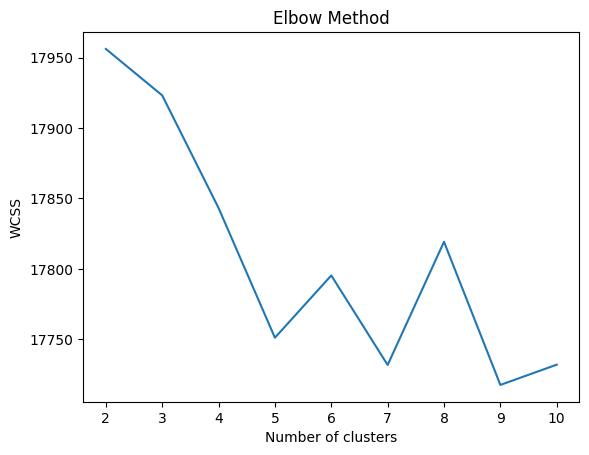

Cluster 0: power | civill | hath | men | man | soveraigne | legislative | commonwealth | god | supreme
Cluster 1: laws | saviour | apostles | new | testament | old | god | time | man | saith
Cluster 2: body | common | case | man | law | naturall | say | parts | stock | men
Cluster 3: god | man | men | law | shall | commonwealth | nature | say | onely | right
Cluster 4: soveraign | power | civill | assembly | authority | commonwealth | subject | man | law | hath
Cluster 5: christ | world | jesus | come | kingdome | god | shall | hath | beleeve | men


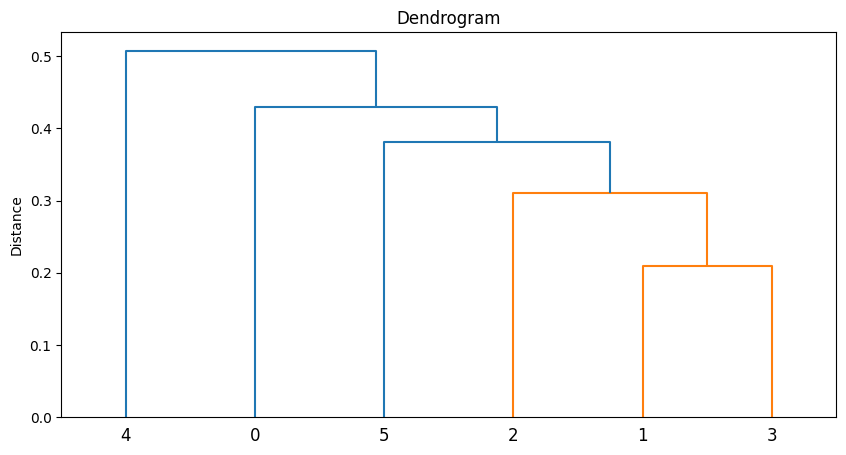

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the text data from the txt file and convert it into a Pandas dataframe
with open('/content/leviathan.txt', 'r') as file:
    data = file.readlines()

df = pd.DataFrame(data, columns=['text'])

# Create a TfidfVectorizer object to convert the text data into a matrix of TF-IDF values
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit a KMeans model with the optimal number of clusters determined from the elbow method
num_clusters = 6 # optimal number of clusters determined from elbow method
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', random_state=0)
kmeans.fit(tfidf)

# Get the top clusters and their corresponding words
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

top_clusters = {}
for i in range(num_clusters):
    cluster_num = i
    words = [terms[ind] for ind in order_centroids[i, :10]]
    top_clusters[cluster_num] = words

# Visualize the top clusters and their words
for cluster_num, words in top_clusters.items():
    print(f'Cluster {cluster_num}: {" | ".join(words)}')

# Visualize the hierarchical distances of each cluster using a dendrogram
Z = linkage(kmeans.cluster_centers_, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()
